<a href="https://colab.research.google.com/github/drmistretta/ACRD/blob/main/Hubble_RGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload three grayscale images (e.g., red, green, blue filters).


Saving blue_filter.jpg to blue_filter.jpg
Saving green_filter.jpg to green_filter.jpg
Saving red_filter.jpg to red_filter.jpg


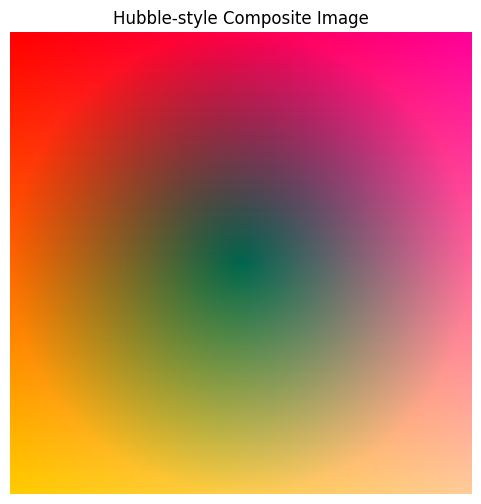

In [1]:
!pip install pillow numpy matplotlib

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO

print("Upload three grayscale images (e.g., red, green, blue filters).")
uploaded = files.upload()
file_names = sorted(uploaded.keys())

# Load and convert to grayscale arrays
arrays = []
for fname in file_names:
    img = Image.open(BytesIO(uploaded[fname])).convert("L")
    arrays.append(np.array(img) / 255.0)

# Assign to channels (students can reorder if needed)
red_norm, green_norm, blue_norm = arrays

# Input user-controlled filter strengths
red_strength = 1.0   # e.g., Hα filter
green_strength = 0.8 # e.g., OIII filter
blue_strength = 0.6  # e.g., SII filter

# Apply strength and convert back to 8-bit
red_final = (red_norm * red_strength * 255).clip(0,255).astype(np.uint8)
green_final = (green_norm * green_strength * 255).clip(0,255).astype(np.uint8)
blue_final = (blue_norm * blue_strength * 255).clip(0,255).astype(np.uint8)

# Stack channels
rgb = np.stack([red_final, green_final, blue_final], axis=-1)

# Visualize inline
plt.figure(figsize=(6,6))
plt.imshow(rgb)
plt.title("Hubble‑style Composite Image")
plt.axis("off")
plt.show()
